In [67]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

In [68]:
# open the data, using SBopen. Filter the df so that only passes are left, This includes removing throw-ins.
parser = Sbopen()
df, related, freeze, tactics = parser.event(15946)
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

# pass map using iterative solution (excluding throw-ins)

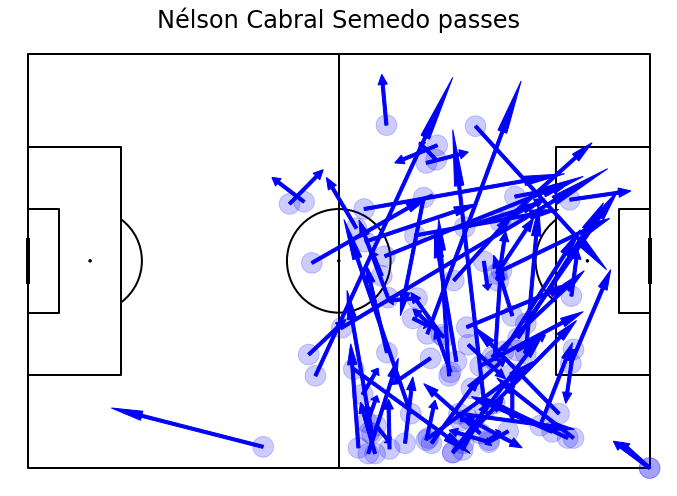

In [69]:
player = 'Lionel Andrés Messi Cuccittini'

#drawing pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))

for i,thepass in passes.iterrows():
    if thepass['player_name']== player:
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="blue")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x'] - x
        dy=thepass['end_y'] - y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="blue")
        ax.add_patch(passArrow)

ax.set_title(f"{player_name} passes", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

# pass map using mplsoccer functions (including throw-ins)

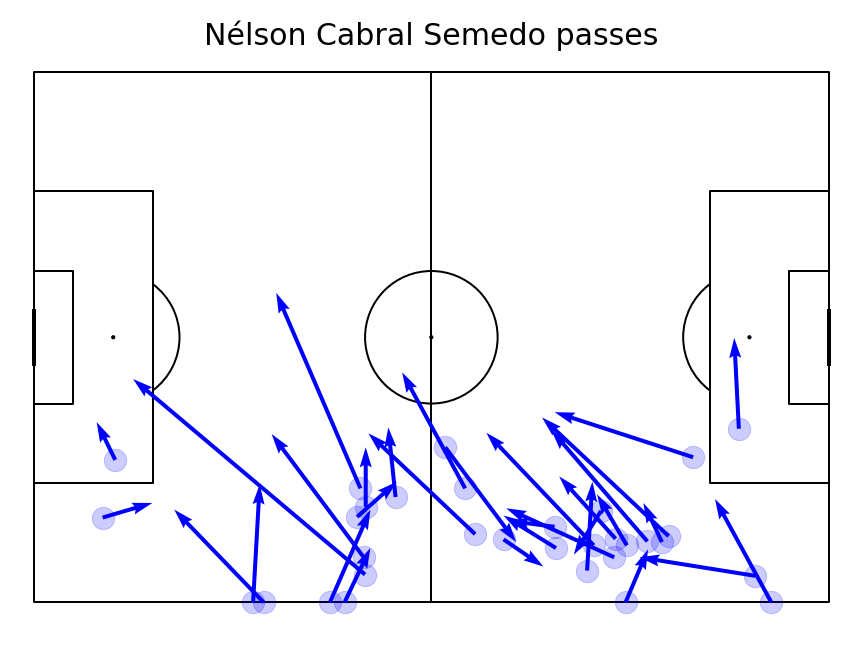

In [70]:
player = 'Nélson Cabral Semedo'
mask = (df.type_name == 'Pass') & (df.player_name == player)
df_pass = df.loc[mask, ['player_name', 'team_name', 'x', 'y', 'end_x', 'end_y']]
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle(f"{player} passes", fontsize = 30)
plt.show()

# Plotting multiple pass maps on one figure

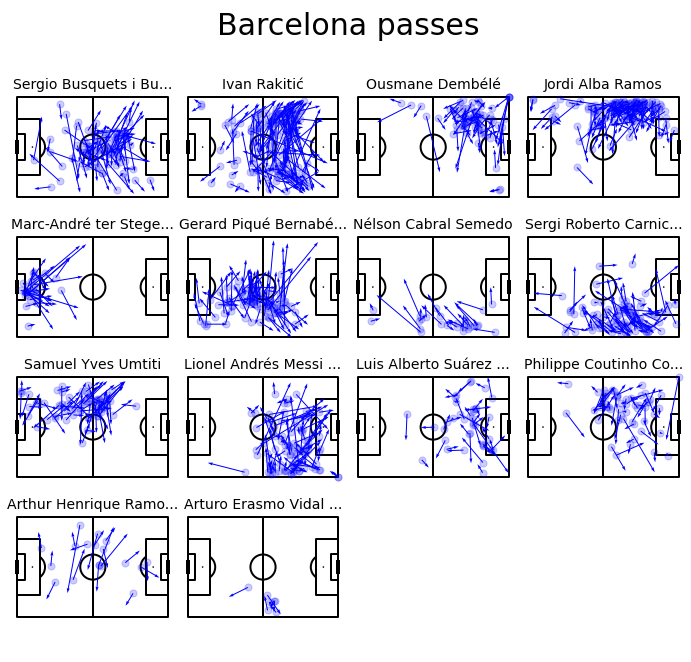

In [71]:
# Choose team
team = 'Barcelona'

# Create a mask based on 'pass', 'team', and that it not being a 'throw-in'. Then apply the mask on the df to create df_passes
mask_team = (df.type_name == 'Pass') & (df.team_name == team) & (df.sub_type_name != 'Throw-in')
df_passes = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', 'player_name', 'team_name']]
# All players that made a pass
names = df_passes['player_name'].unique()

# draw the pitch
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

# Function to truncate player names
def truncate_name(name, length):
    if len(name) > length:
        return name[:length] + '...'
    else:
        return name

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    # Truncate player name
    truncated_name = truncate_name(name, 20)
    #put player name over the plot
    ax.text(60, -10, truncated_name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, f'{team} passes', ha='center', va='center', fontsize=30)
plt.show()